In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.shape

(10683, 11)

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [10]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/3978344372.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col]=pd.to_datetime(df[col])


In [11]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month
df['journey_year']=df['Date_of_Journey'].dt.year

In [13]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-09-01 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-01 05:50:00,2023-09-01 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-01 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-09-01 18:05:00,2023-09-01 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-09-01 16:50:00,2023-09-01 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [15]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
def extract_min(df,col):
    df[col+'_minute']=df[col].dt.hour

def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [16]:
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')

In [17]:
drop_column(df,'Dep_Time')

In [18]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-01 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-09-01 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-09-01 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,16


In [19]:
extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')
drop_column(df,'Arrival_Time')

In [20]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,5,13,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,9,4,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,18,23,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,16,21,21


In [21]:
duration=list(df['Duration'])
drop_column(df,'Duration')

In [22]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] + ' 0m'
        else:
            duration[i]='0h ' + duration[i]
df['Duration']=duration

In [23]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,22,1,1,2h 50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,5,13,13,7h 25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,9,4,4,19h 0m
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,18,23,23,5h 25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,16,21,21,4h 45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2019,19,19,22,22,2h 30m
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,20,23,23,2h 35m
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,8,11,11,3h 0m
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,2019,11,11,14,14,2h 40m


In [24]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [25]:
df['Duration_Hours']=df['Duration'].apply(hour)
df['Duration_Mins']=df['Duration'].apply(minute)
drop_column(df,'Duration')


In [26]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,22,1,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,5,13,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,9,4,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,18,23,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,16,21,21,4,45


In [27]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_Hours         object
Duration_Mins          object
dtype: object

In [28]:
df['Duration_Hours']=df['Duration_Hours'].astype(int)
df['Duration_Mins']=df['Duration_Mins'].astype(int)


In [29]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_Hours          int64
Duration_Mins           int64
dtype: object

In [30]:
cat_col=[col for col in df.columns if df[col].dtypes=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [31]:
cont_col=[col for col in df.columns if df[col].dtypes!='O']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_Hours',
 'Duration_Mins']

In [32]:
cat_df=df[cat_col]
cat_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [33]:
cat_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

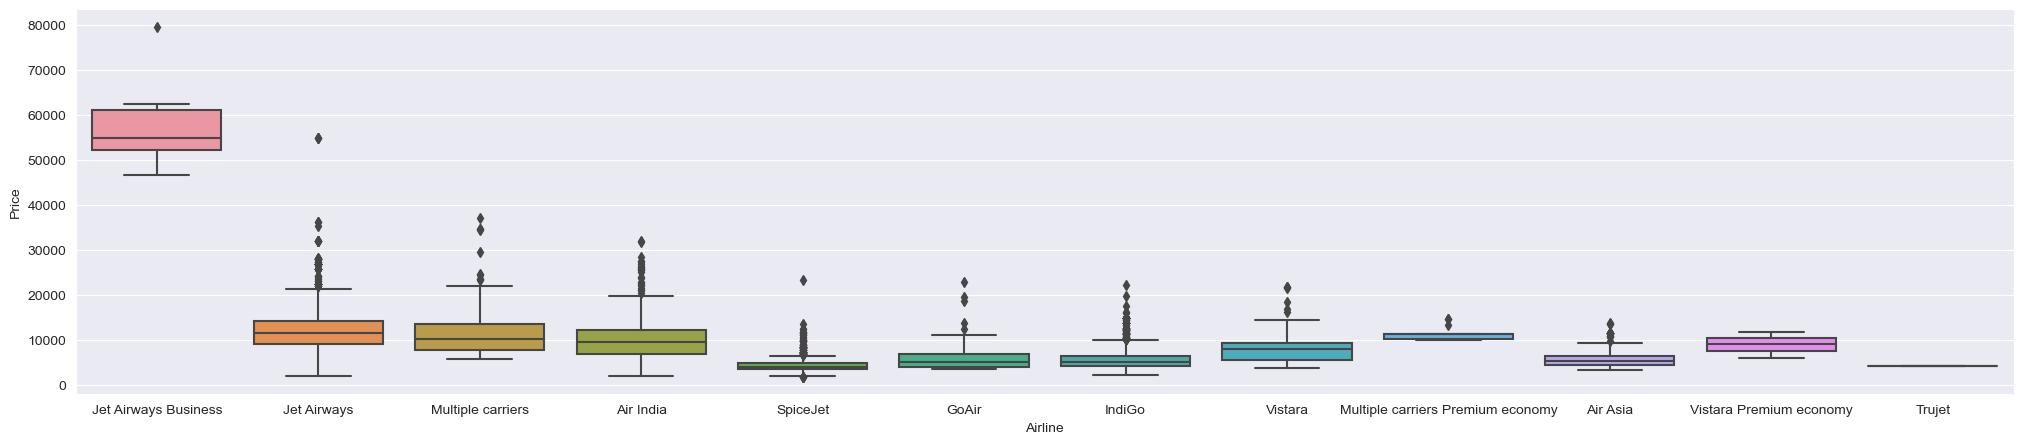

In [34]:
plt.figure(figsize=(25,5))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Total_Stops', ylabel='Price'>

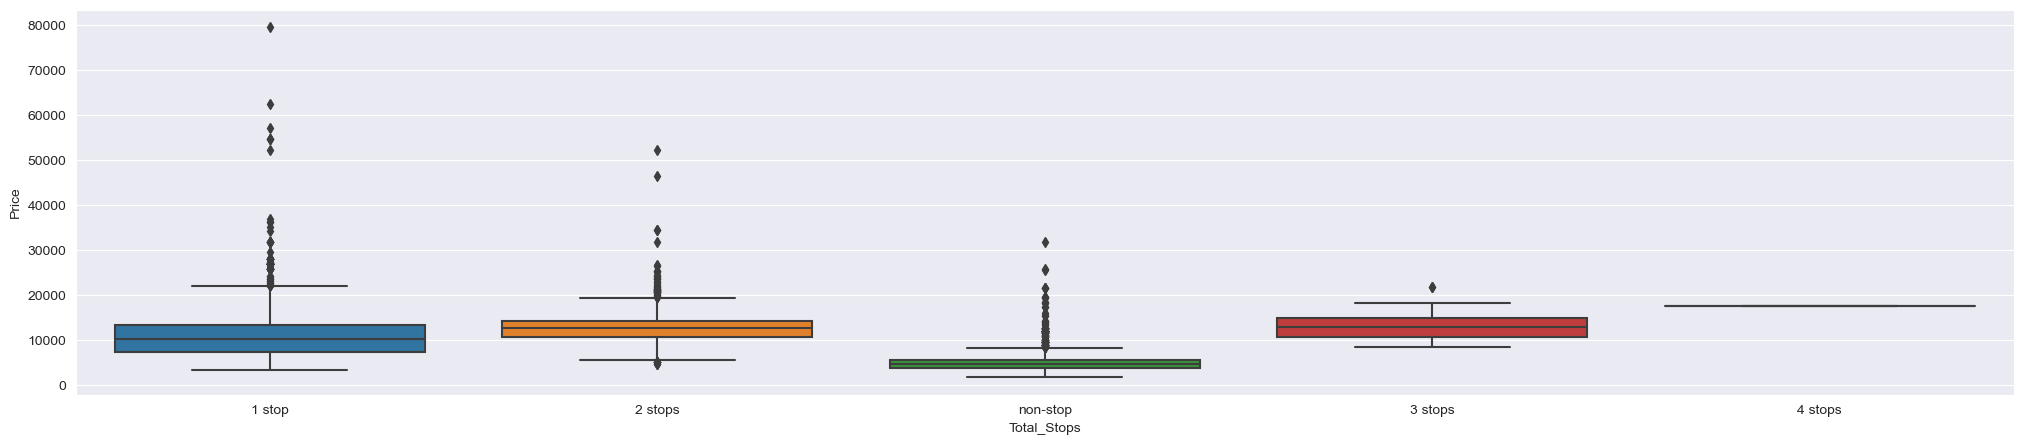

In [35]:
plt.figure(figsize=(25,5))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [36]:
Airline=pd.get_dummies(cat_df['Airline'],drop_first=True)
Airline


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


<Axes: xlabel='Source', ylabel='Price'>

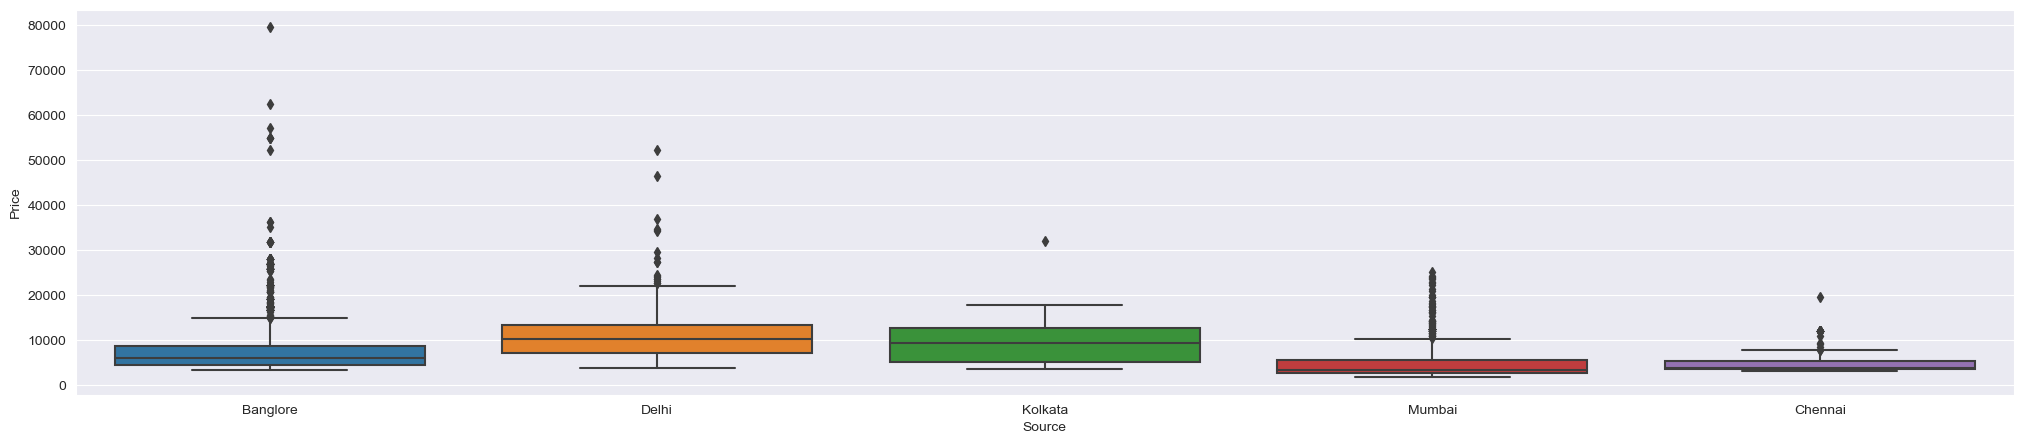

In [37]:
plt.figure(figsize=(25,5))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

In [38]:
Source=pd.get_dummies(cat_df['Source'],drop_first=True)
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


<Axes: xlabel='Destination', ylabel='Price'>

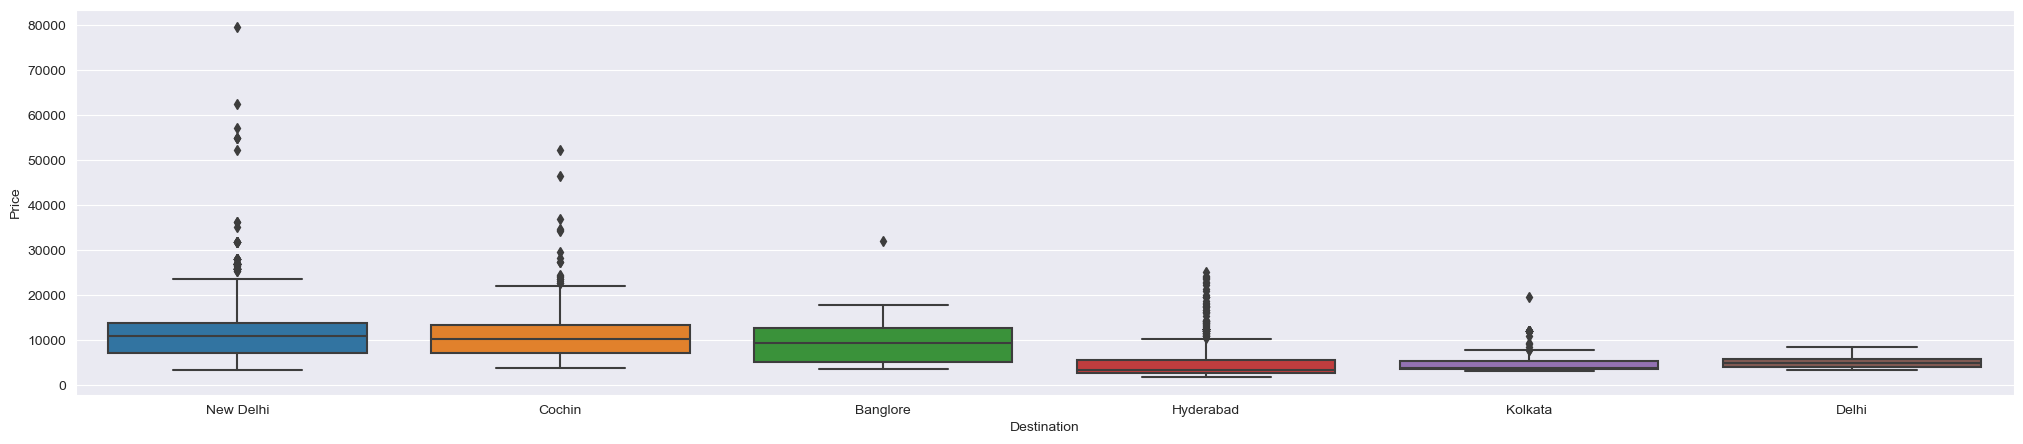

In [39]:
plt.figure(figsize=(25,5))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [40]:
Destination=pd.get_dummies(cat_df['Destination'],drop_first=True)
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [41]:
cat_df['Route_1']=cat_df['Route'].str.split('→').str[0]
cat_df['Route_2']=cat_df['Route'].str.split('→').str[1]
cat_df['Route_3']=cat_df['Route'].str.split('→').str[2]
cat_df['Route_4']=cat_df['Route'].str.split('→').str[3]
cat_df['Route_5']=cat_df['Route'].str.split('→').str[4]

cat_df

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/4158502305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Route_1']=cat_df['Route'].str.split('→').str[0]
/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/4158502305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Route_2']=cat_df['Route'].str.split('→').str[1]
/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/4158502305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [42]:
drop_column(cat_df,'Route')

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/910864875.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col,axis=1,inplace=True)


In [43]:
cat_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [44]:
cat_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [45]:
for i in ['Route_3','Route_4','Route_5']:
    cat_df[i].fillna('None',inplace=True)
cat_df.isnull().sum()

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/4020233399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[i].fillna('None',inplace=True)


Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [46]:
for i in cat_df.columns:
    print('{} has total {} categories'.format(i,len(cat_df[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [47]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [48]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    cat_df[i]=encoder.fit_transform(cat_df[i])
cat_df

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/4071949891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[i]=encoder.fit_transform(cat_df[i])
/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/4071949891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[i]=encoder.fit_transform(cat_df[i])
/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/4071949891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,No info,0,13,29,13,5


In [49]:
drop_column(cat_df,'Additional_Info')

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/910864875.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col,axis=1,inplace=True)


In [50]:
cat_df

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,0,13,29,13,5


In [51]:
dict={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [52]:
cat_df['Total_Stops']=cat_df['Total_Stops'].map(dict)
cat_df

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/1918699464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Total_Stops']=cat_df['Total_Stops'].map(dict)


,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,2,5,29,13,5
10679,Air India,Kolkata,Banglore,0,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,0,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,0,0,13,29,13,5


In [53]:
data_train=pd.concat([cat_df,Airline,Source,Destination,df[cont_col]],axis=1)
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')
data_train

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins
0,0,0,13,29,13,5,0,0,1,0,...,3897,24,3,2019,22,22,1,1,2,50
1,2,2,25,1,3,5,1,0,0,0,...,7662,5,1,2019,5,5,13,13,7,25
2,2,3,32,4,5,5,0,0,0,1,...,13882,6,9,2019,9,9,4,4,19,0
3,1,2,34,3,13,5,0,0,1,0,...,6218,5,12,2019,18,18,23,23,5,25
4,1,0,34,8,13,5,0,0,1,0,...,13302,3,1,2019,16,16,21,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,...,4107,4,9,2019,19,19,22,22,2,30
10679,0,2,5,29,13,5,1,0,0,0,...,4145,27,4,2019,20,20,23,23,2,35
10680,0,0,13,29,13,5,0,0,0,1,...,7229,27,4,2019,8,8,11,11,3,0
10681,0,0,13,29,13,5,0,0,0,0,...,12648,3,1,2019,11,11,14,14,2,40


In [54]:
pd.set_option('display.max_columns',35)
data_train

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897,24,3,2019,22,22,1,1,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662,5,1,2019,5,5,13,13,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882,6,9,2019,9,9,4,4,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218,5,12,2019,18,18,23,23,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302,3,1,2019,16,16,21,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,4107,4,9,2019,19,19,22,22,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,4145,27,4,2019,20,20,23,23,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,7229,27,4,2019,8,8,11,11,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,12648,3,1,2019,11,11,14,14,2,40


In [55]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/2803530924.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


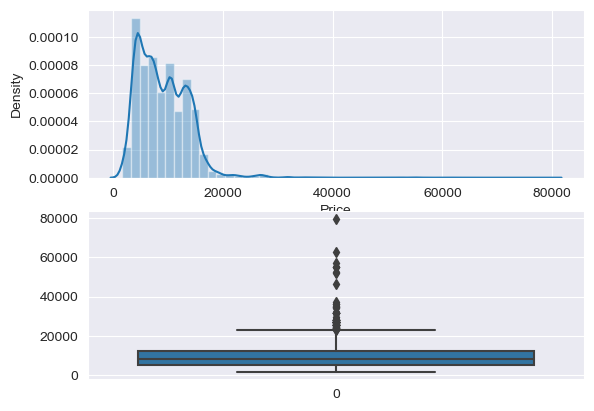

In [56]:
plot(data_train,'Price')

In [57]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_15103/2803530924.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


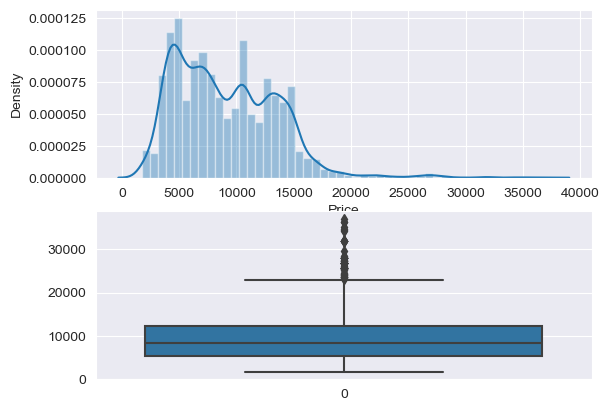

In [58]:
plot(data_train,'Price')

In [59]:
X=data_train.drop('Price',axis=1)
X

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,2019,22,22,1,1,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,2019,5,5,13,13,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,2019,9,9,4,4,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,2019,18,18,23,23,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2019,16,16,21,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,9,2019,19,19,22,22,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27,4,2019,20,20,23,23,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,27,4,2019,8,8,11,11,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,1,2019,11,11,14,14,2,40


In [60]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [61]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([2.16673297, 2.36270899, 1.67033112, 1.00469489, 1.95076755,
       1.0686275 , 0.77183618, 0.07810836, 0.67431685, 0.93795488,
       0.        , 0.44453165, 0.        , 0.28476342, 0.        ,
       0.22901887, 0.        , 0.16039983, 1.52265552, 0.86155828,
       0.30078139, 1.51653425, 0.37328586, 0.30311138, 0.15682811,
       0.30080113, 0.5136726 , 1.07462067, 1.46240857, 1.15381702,
       1.14211885, 1.18311787, 1.18039959, 0.9172794 , 0.92677389])

In [62]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

In [63]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_1,2.383970
Total_Stops,2.150679
Route_4,1.988497
Route_2,1.625087
Cochin,1.540922
Delhi,1.536628
journey_year,1.467054
Arrival_Time_minute,1.204618
Dep_Time_minute,1.164506
Arrival_Time_hour,1.162002


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import metrics

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [66]:
def predict_function(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score: {}'.format(model.score(X_train,y_train)))
    predictions=model.predict(X_test)
    print('predictions are {}'.format(predictions))
    print('\n')
    r2_score=metrics.r2_score(y_test,predictions)
    print('my r-square is {}'.format(r2_score))
    print('my MAE:',metrics.mean_absolute_error(y_test,predictions))
    print('my MSE:',metrics.mean_squared_error(y_test,predictions))
    print('my MAE:',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

In [67]:
predict_function(rfr())

Training score: 0.9511813759831542
predictions are [ 5152.31        4336.92533333  4252.90583333 ...  5852.97
 12845.06       14009.60833333]


my r-square is 0.8235646520458603
my MAE: 1165.4078477974479
my MSE: 3540483.4844161393
my MAE: 34.138070358434845
